In [ ]:
import sys
import os

# Add the src directory to the Python path
src_path = os.path.join(os.getcwd(), 'src')
if src_path not in sys.path:
    sys.path.append(src_path)

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from optimizers import *

In [2]:
########################################################
### Don't forget to change the path to the data file ###
########################################################

df = pd.read_csv("/Users/Mostafa/Desktop/first_year_Pisa/ML/project_implementation/data/monk1/monks-1.train", names=[0,1,2,3,4,5,6,"index"], delimiter= " ")
df.set_index("index", inplace=True)
df

,0,1,2,3,4,5,6
index,,,,,,,
data_4,0,1,1,1,1,2,2
data_7,0,1,1,1,1,4,1
data_9,0,1,1,1,2,1,1
data_10,0,1,1,1,2,1,2
data_11,0,1,1,1,2,2,1
...,...,...,...,...,...,...,...
data_421,0,3,3,2,2,3,1
data_422,0,3,3,2,2,3,2
data_425,1,3,3,2,3,1,1


In [6]:
y = df.iloc[:, 0]  # First column as target
X = df.iloc[:, 1:]  # All other columns as features

# Print the results to verify
print("Target (y):")
print(y.head())
print(len(y))
print("\nFeatures (X):")
print(X.head())

Target (y):
index
data_4     0
data_7     0
data_9     0
data_10    0
data_11    0
Name: 0, dtype: int64
169

Features (X):
         1  2  3  4  5  6
index                    
data_4   1  1  1  1  2  2
data_7   1  1  1  1  4  1
data_9   1  1  1  2  1  1
data_10  1  1  1  2  1  2
data_11  1  1  1  2  2  1


In [7]:
test_data = pd.read_csv("/Users/Mostafa/Desktop/first_year_Pisa/ML/project_implementation/data/monk2/monks-2.test", names=[0,1,2,3,4,5,6,"index"], delimiter= " ")
test_data.set_index("index", inplace=True)
# test_data.head()

In [8]:
y_test = test_data.iloc[:, 0]  
X_test = test_data.iloc[:, 1:]

In [9]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shape of the resulting datasets
print("Training Features Shape:", X_train.shape)
print("Validation Features Shape:", X_val.shape)
print("Training Target Shape:", y_train.shape)
print("Validation Target Shape:", y_val.shape)

Training Features Shape: (135, 6)
Validation Features Shape: (34, 6)
Training Target Shape: (135,)
Validation Target Shape: (34,)


In [ ]:
def create_batches(X, y, batch_size):
    """Create mini-batches from the data"""
    # Convert to numpy array if input is pandas DataFrame/Series
    if isinstance(X, pd.DataFrame):
        X = X.values
    if isinstance(y, pd.Series):
        y = y.values
    
    n_samples = X.shape[0]
    indices = np.arange(n_samples)
    np.random.shuffle(indices)
    
    for start_idx in range(0, n_samples, batch_size):
        end_idx = min(start_idx + batch_size, n_samples)
        batch_indices = indices[start_idx:end_idx]
        
        yield X[batch_indices], y[batch_indices]

# def create_batches(X, y, batch_size):
#     """Create mini-batches from the data"""
#     n_samples = len(X)
#     indices = np.random.permutation(n_samples)
    
#     # Reshape X_train and y_train if needed
#     if len(X.shape) == 1:
#         X = X.reshape(-1, 1)
        
#     for i in range(0, n_samples, batch_size):
#         batch_indices = indices[i:min(i + batch_size, n_samples)]
#         yield X[batch_indices], y[batch_indices]

here


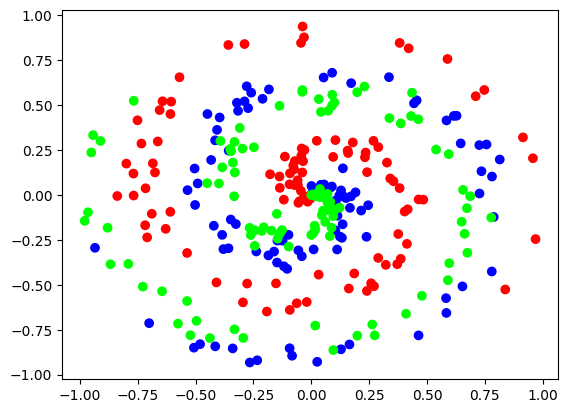

epoch:  0, acc: 0.644, loss: -0.657, learning_rate: 1 
epoch:  100, acc: 0.667, loss: -0.637, learning_rate: 0.9099181073703367 
epoch:  200, acc: 0.667, loss: -0.637, learning_rate: 0.8340283569641367 
epoch:  300, acc: 0.667, loss: -0.637, learning_rate: 0.7698229407236336 
epoch:  400, acc: 0.667, loss: -0.637, learning_rate: 0.7147962830593281 
epoch:  500, acc: 0.667, loss: -0.637, learning_rate: 0.66711140760507 
epoch:  600, acc: 0.667, loss: -0.637, learning_rate: 0.6253908692933083 
epoch:  700, acc: 0.667, loss: -0.637, learning_rate: 0.5885815185403178 
epoch:  800, acc: 0.667, loss: -0.637, learning_rate: 0.5558643690939411 
epoch:  900, acc: 0.667, loss: -0.637, learning_rate: 0.526592943654555 
epoch:  1000, acc: 0.667, loss: -0.637, learning_rate: 0.5002501250625312 
epoch:  1100, acc: 0.667, loss: -0.637, learning_rate: 0.4764173415912339 
epoch:  1200, acc: 0.667, loss: -0.637, learning_rate: 0.45475216007276037 
epoch:  1300, acc: 0.667, loss: -0.637, learning_rate: 0

In [10]:
import numpy as np
np.random.seed(0)

    
class Layer_Dense:
    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.1 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))
        
    def forward(self, inputs):
        self.inputs = inputs
        self.output = np.dot(inputs, self.weights) + self.biases
   
    def backward(self, dvalues):
        # Gradients on parameters
        self.dweights = np.dot(self.inputs.T, dvalues) 
        self.dbiases = np.sum(dvalues, axis=0, keepdims=True)
        # Gradient on values 
        self.dinputs = np.dot(dvalues, self.weights.T)         

class Activation_ReLU:
    def forward(self, inputs):
        self.inputs = inputs
        self.output = np.maximum(0, inputs)

    def backward(self, dvalues):
        # Since we need to modify the orginial variable,
        # let's make a copy of the values first
        self.dinputs = dvalues.copy()
        
        # zero gradient where input values were negative
        self.dinputs[self.inputs <= 0] = 0

        
class Activation_Softmax:
    def forward(self, inputs):
        self.inputs = inputs
        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
        probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=True)
        self.output = probabilities

    def backward(self, dvalues):
        self.dinputs = np.empty_like(dvalues)
        
        for index, (single_output, single_dvalues) in \
                enumerate(zip(self.output, dvalues)):
            single_output = single_output.reshape(-1, 1)
            
            jacobian_matrix = np.diagflat(single_output) - \
                                np.dot(single_output, single_output.T)

            self.dinputs[index] = np.dot(jacobian_matrix, single_dvalues)

class Loss:
    def calculate(self, output, y):
        sample_losses = self.forward(output, y)
        data_loss = np.mean(sample_losses)
        return data_loss
    
class Loss_CategoricalCrossentropy(Loss):
    def forward(self, y_pred, y_true):
        samples = len(y_pred)
        y_pred_clipped = np.clip(y_pred, 1e-7, 1-1e-7)
        
        if len(y_true.shape) == 1:
            correct_confidence = y_pred_clipped[range(samples), y_true]
            
        elif len(y_true.shape) == 2:
            correct_confidence = np.sum(y_pred_clipped * y_true, axis=1) 
            
        negative_log_likelihoods = np.log(correct_confidence)
        return negative_log_likelihoods
    
    def backward(self, dvalues, y_true):
 
        # Number of samples 
        samples = len(dvalues) 
        # Number of labels in every sample 
        # We'll use the first sample to count them 
        labels = len(dvalues[0]) 
 
        # If labels are sparse, turn them into one-hot vector 
        if len(y_true.shape) == 1: 
            y_true = np.eye(labels)[y_true] 
 
        # Calculate gradient 
        self.dinputs = -y_true / dvalues 
        # Normalize gradient 
        self.dinputs = self.dinputs / samples
        
        
class Activation_Softmax_Loss_CategoricalCrossentropy():
    
    def __init__(self):
        self.activation = Activation_Softmax()
        self.loss = Loss_CategoricalCrossentropy()
        
        
    def forward(self, inputs, y_true):
        # Output layer's activation function
        self.activation.forward(inputs)
        
        # Set the output 
        self.output = self.activation.output
        
        return self.loss.calculate(self.output, y_true)
    
    def backward(self, dvalues, y_true):
        samples = len(dvalues)
        
        if len(y_true.shape) == 2:
            y_true = np.argmax(y_true, axis=1)
        
        self.dinputs = dvalues.copy()
        
        self.dinputs[range(samples), y_true] -= 1
        
        self.dinputs = self.dinputs / samples


    
# X, y = create_data(100, 3)
 
dense1 = Layer_Dense(6, 10)
activation1 = Activation_ReLU()

dense2 = Layer_Dense(10, 2)

loss_activation = Activation_Softmax_Loss_CategoricalCrossentropy()


optimizer = Optimizer_Adam(learning_rate=0.003)
# optimizer = Optimizer_Adagrad(learning_rate=0.3, decay=1e-3)
# optimizer = Optimizer_SGD(learning_rate=0.003, momentum=0.90)
# optimizer = Optimizer_RMSprop(learning_rate=0.003, decay=1e-3)

# Training hyperparameters
n_epochs = 3000
batch_size = 1 # You can adjust this value

# Training loop
for epoch in range(n_epochs):
    batch_losses = []
    batch_accuracies = []
    
    # Mini-batch training
    for X_batch, y_batch in create_batches(X_train, y_train, batch_size):
        # Forward pass
        dense1.forward(X_batch)
        activation1.forward(dense1.output)
        dense2.forward(activation1.output)
        loss = loss_activation.forward(dense2.output, y_batch)
        
        # Calculate accuracy for this batch
        predictions = np.argmax(loss_activation.output, axis=1)
        if len(y_batch.shape) == 2:
            y_true = np.argmax(y_batch, axis=1)
        else:
            y_true = y_batch
        accuracy = np.mean(predictions == y_true)
        
        # Backward pass
        loss_activation.backward(loss_activation.output, y_batch)
        dense2.backward(loss_activation.dinputs)
        activation1.backward(dense2.dinputs)
        dense1.backward(activation1.dinputs)
        
        # Update weights and biases
        optimizer.pre_update_params()
        optimizer.update_params(dense1)
        optimizer.update_params(dense2)
        optimizer.post_update_params()
        
        batch_losses.append(loss)
        batch_accuracies.append(accuracy)
    
    # Calculate epoch-level metrics
    epoch_loss = np.mean(batch_losses)
    epoch_accuracy = np.mean(batch_accuracies)
    
    # Print progress
    if not epoch % 100:
        print(f"epoch: {epoch}, "
              f"acc: {epoch_accuracy:.3f}, "
              f"loss: {epoch_loss:.3f}, "
              f"learning_rate: {optimizer.current_learning_rate}")